In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | morgan city
Processing Record 2 of Set 1 | eureka
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | muros
Processing Record 9 of Set 1 | leningradskiy
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | plettenberg bay
Processing Record 14 of Set 1 | pemba
Processing Record 15 of Set 1 | broken hill
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | oranjestad
Processing Record 21 of Set 1 | bambous virieux
Processing Record 22 of Set 1 | caohe
Processing R

Processing Record 39 of Set 4 | wuhu
Processing Record 40 of Set 4 | tuktoyaktuk
Processing Record 41 of Set 4 | we
City not found. Skipping...
Processing Record 42 of Set 4 | sola
Processing Record 43 of Set 4 | domoni
Processing Record 44 of Set 4 | coquimbo
Processing Record 45 of Set 4 | ambon
Processing Record 46 of Set 4 | meyungs
City not found. Skipping...
Processing Record 47 of Set 4 | russell
Processing Record 48 of Set 4 | kaeo
Processing Record 49 of Set 4 | sahuaripa
Processing Record 50 of Set 4 | narsaq
Processing Record 1 of Set 5 | peniche
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | yilan
Processing Record 4 of Set 5 | coihaique
Processing Record 5 of Set 5 | alofi
Processing Record 6 of Set 5 | lorengau
Processing Record 7 of Set 5 | east london
Processing Record 8 of Set 5 | yakeshi
Processing Record 9 of Set 5 | deputatskiy
Processing Record 10 of Set 5 | antigonish
Processing Record 11 of Set 5 | rasht
Processing Record 12 of Set 5 | to

Processing Record 26 of Set 8 | cockburn town
Processing Record 27 of Set 8 | armidale
Processing Record 28 of Set 8 | gat
Processing Record 29 of Set 8 | fiumicino
Processing Record 30 of Set 8 | varhaug
Processing Record 31 of Set 8 | dengfeng
Processing Record 32 of Set 8 | fenoarivo
Processing Record 33 of Set 8 | maraa
Processing Record 34 of Set 8 | vacaria
Processing Record 35 of Set 8 | cookshire
City not found. Skipping...
Processing Record 36 of Set 8 | luderitz
Processing Record 37 of Set 8 | juneau
Processing Record 38 of Set 8 | kabinda
Processing Record 39 of Set 8 | zhigansk
Processing Record 40 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 41 of Set 8 | callaway
Processing Record 42 of Set 8 | marshall
Processing Record 43 of Set 8 | ponta do sol
Processing Record 44 of Set 8 | bandarbeyla
Processing Record 45 of Set 8 | chimbote
Processing Record 46 of Set 8 | kahului
Processing Record 47 of Set 8 | kovdor
Processing Record 48 of Set 8 | baker 

Processing Record 17 of Set 12 | severo-yeniseyskiy
Processing Record 18 of Set 12 | husavik
Processing Record 19 of Set 12 | batemans bay
Processing Record 20 of Set 12 | bulz
Processing Record 21 of Set 12 | shonguy
Processing Record 22 of Set 12 | kandrian
Processing Record 23 of Set 12 | san carlos de bariloche
Processing Record 24 of Set 12 | wawa
Processing Record 25 of Set 12 | kalamare
Processing Record 26 of Set 12 | moose factory
Processing Record 27 of Set 12 | abu kamal
Processing Record 28 of Set 12 | boca do acre
Processing Record 29 of Set 12 | waingapu
Processing Record 30 of Set 12 | monrovia
Processing Record 31 of Set 12 | tarakan
Processing Record 32 of Set 12 | salalah
Processing Record 33 of Set 12 | los llanos de aridane
Processing Record 34 of Set 12 | stranda
Processing Record 35 of Set 12 | burnie
Processing Record 36 of Set 12 | varnavino
Processing Record 37 of Set 12 | illela
Processing Record 38 of Set 12 | tarauaca
Processing Record 39 of Set 12 | tual
Pr

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Morgan City,29.6994,-91.2068,66.20,100,0,8.05,US,2022-01-09 03:32:28
1,Eureka,40.8021,-124.1637,43.66,77,34,5.91,US,2022-01-09 03:32:28
2,Torbay,47.6666,-52.7314,23.58,78,75,8.01,CA,2022-01-09 03:30:20
3,Kodiak,57.7900,-152.4072,27.91,74,100,14.97,US,2022-01-09 03:32:30
4,Vaini,-21.2000,-175.2000,75.85,83,100,12.57,TO,2022-01-09 03:32:30
5,Kapaa,22.0752,-159.3190,76.98,74,100,1.01,US,2022-01-09 03:32:31
6,Punta Arenas,-53.1500,-70.9167,46.51,71,0,6.91,CL,2022-01-09 03:32:33
7,Muros,42.7762,-9.0603,57.09,96,100,14.45,ES,2022-01-09 03:32:34
8,Leningradskiy,69.3833,178.4167,-13.58,95,73,11.01,RU,2022-01-09 03:32:34
9,Puerto Ayora,-0.7393,-90.3518,71.73,88,60,4.79,EC,2022-01-09 03:32:35


In [16]:
#Reorder columms
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Morgan City,US,2022-01-09 03:32:28,29.6994,-91.2068,66.20,100,0,8.05
1,Eureka,US,2022-01-09 03:32:28,40.8021,-124.1637,43.66,77,34,5.91
2,Torbay,CA,2022-01-09 03:30:20,47.6666,-52.7314,23.58,78,75,8.01
3,Kodiak,US,2022-01-09 03:32:30,57.7900,-152.4072,27.91,74,100,14.97
4,Vaini,TO,2022-01-09 03:32:30,-21.2000,-175.2000,75.85,83,100,12.57
5,Kapaa,US,2022-01-09 03:32:31,22.0752,-159.3190,76.98,74,100,1.01
6,Punta Arenas,CL,2022-01-09 03:32:33,-53.1500,-70.9167,46.51,71,0,6.91
7,Muros,ES,2022-01-09 03:32:34,42.7762,-9.0603,57.09,96,100,14.45
8,Leningradskiy,RU,2022-01-09 03:32:34,69.3833,178.4167,-13.58,95,73,11.01
9,Puerto Ayora,EC,2022-01-09 03:32:35,-0.7393,-90.3518,71.73,88,60,4.79


In [18]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

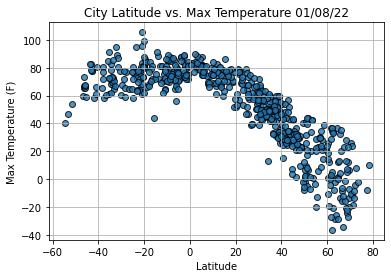

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

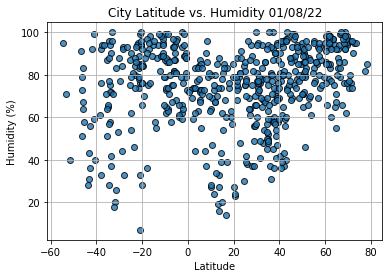

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

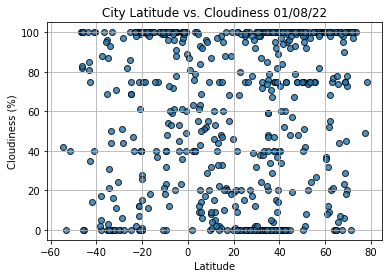

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

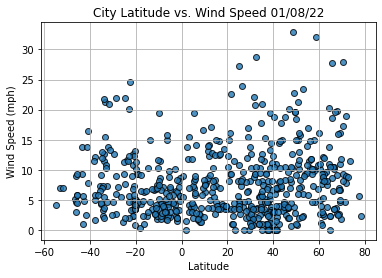

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

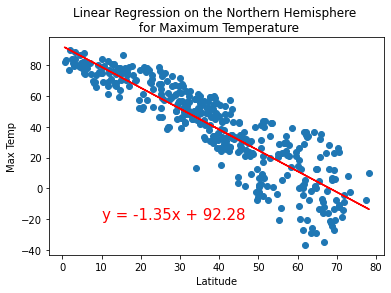

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

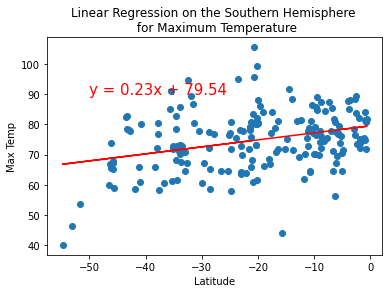

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

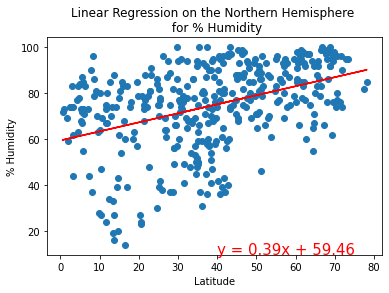

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

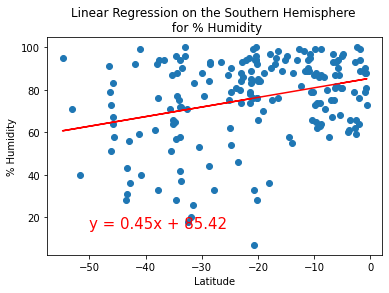

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

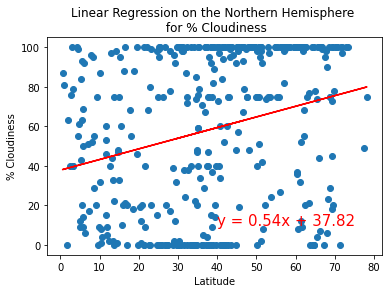

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

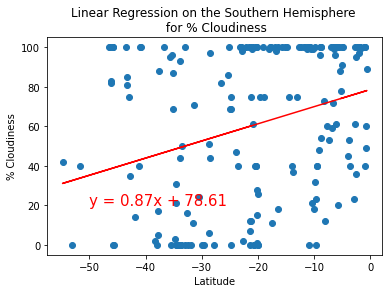

In [53]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]

# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,20))

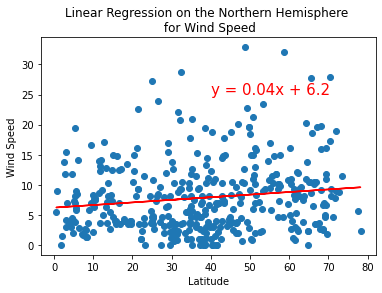

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

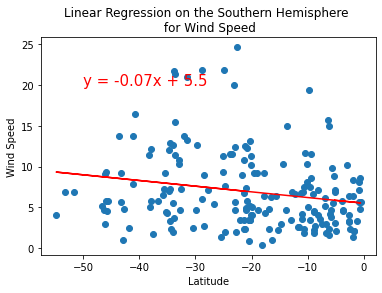

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))